In [18]:
import seaborn as sns
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

## Removing null from dataset

In [2]:
dataset = sns.load_dataset('titanic')

null_columns=dataset.columns[dataset.isnull().any()]
#print(dataset[dataset.isnull().any(axis=1)][null_columns].head())

null_row_index = dataset[dataset.isnull().any(axis=1)][null_columns].index

dataset = dataset.drop(index=null_row_index)
print(dataset[dataset.isnull().any(axis=1)][null_columns])
print(dataset.columns[dataset.isnull().any()])


Empty DataFrame
Columns: [age, embarked, deck, embark_town]
Index: []
Index([], dtype='object')


## Visualizing data

In [4]:
dataset.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True


## Getting metrics from dataset

In [10]:
survided_num = (dataset['survived'] == 1).sum()
women_num = (dataset['sex'] == "female").sum()
men_num = (dataset['sex'] == "male").sum()

print("number of survivals: ", survided_num)
print("average number of passengers: ", int(dataset['age'].mean()))
print("number of women:", women_num)
print("number of men:", men_num)

number of survivals:  123
average number of passengers:  35
number of women: 88
number of men: 94


## Checking men and women distribuitions

<Axes: >

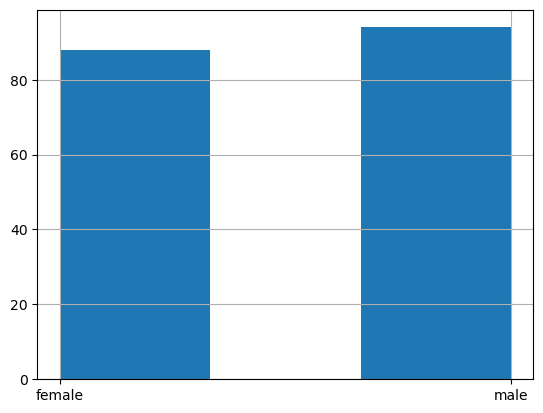

In [12]:
dataset['sex'].hist(bins=3) # Creates a histogram for the 'Value' column with 5 bins

## Checking fare distribution regarding class

[1 3 2]


IndexError: index 3 is out of bounds for axis 0 with size 3

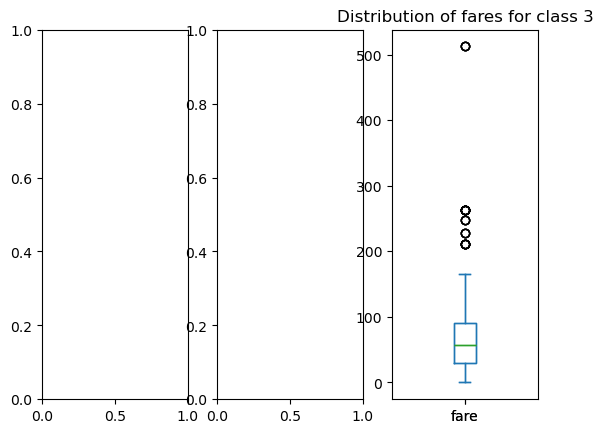

In [ ]:
unique_classes = dataset["pclass"].unique()
print(unique_classes)

fig, axes = plt.subplots(1, len(unique_classes))

for elem in unique_classes:
    class_dataset = dataset[dataset['pclass'] == elem]
    axes[elem] = dataset['fare'].plot(kind='box', title=f'Distribution of fares for class {elem}')

plt.show()